# Test of n-body solver for the 'figure of eight' example three-body system

The outline of this problem with initial conditions is presented by [ALAIN CHENCINER et al](https://www.jstor.org/stable/pdf/2661357.pdf)

In [15]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

import nbody

Take the first 6250 points (about one period), then sample every 100 points for animation.

In [16]:
gravity, masses, times, coords, tf = nbody.solve_for('figureeight')
t = times[:6250:100]
r = coords[:, :6250:100]

Loading trajectories from file...


In [17]:
%%capture
%matplotlib inline
# %matplotlib ipympl
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)

Plot the [Lemniscate of Bernoulli](https://www.wikiwand.com/en/Lemniscate_of_Bernoulli)

In [18]:
theta = np.linspace(0, 2 * np.pi, 1000)
a = .765
x = a * np.sqrt(2) * np.cos(theta) / (np.sin(theta)**2 + 1)
y = .925 * x * np.sin(theta)  # Minor correction to fit

ax.plot(x, y)

In [19]:
graph, = ax.plot([], [], marker='o', ls='')

def update(frame_number):
    xs = r[:3, frame_number]
    ys = r[3:6, frame_number]
    graph.set_data(xs, ys)
    return graph,

In [20]:
anim = animation.FuncAnimation(fig, update, frames=len(t), interval=40, blit=True)
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
HTML(anim.to_jshtml())

## Physical Tests

- Total angular momenta should be zero at all times
- Total energy should be constant

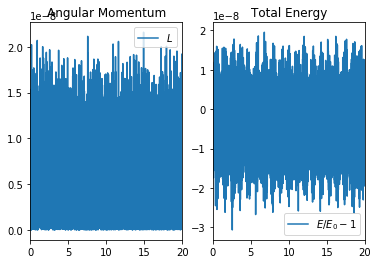

In [21]:
fig, (momenta_ax, energy_ax) = plt.subplots(ncols=2)

nbody.draw_stats(gravity, masses, times, coords, axs=(momenta_ax, energy_ax), fig=fig, rel_L=False)

fig.canvas.draw()

### Conclusions
The n-body solver appears accurate for this three-body example as total enegy and total angular momenta are conserved.